# **Weather.ipynb**
A program to plot "dryBulbTemperature_Celsius" temperature over time from a csv file\
Please refer to weather.py file for an interactive version of the end state graph where each x and y value is visible by hovering over each x,y point\
Author: Paul O'Shaughnessy

## **1. Setting up the Data**

#### **1.1 Importing Libraries**

- Pandas is a Python Library used for cleaning, analyzing and manipulating data. More information can be found [here](https://pandas.pydata.org/docs/)
- Matplotlib is a comprehensive Python library for creating static, animated, and interactive visualizations in Python. More information can be found [here](https://matplotlib.org/)
- NumPy, which stands for Numerical Python, is a fundamental package for scientific computing in Python. More information can be found [here](https://numpy.org/)

In [1]:
# Import Pandas
import pandas as pd

# Import Matplotlib
import matplotlib.pyplot as plt

# Import Numpy
import numpy as np

#### **1.2 Loading the Data**   
- The weatherreadings1 dataset, which is a csv file, is loaded using Pandas *read_csv* functionality.
- The variable *weather* is assigned to the dataset for ease of use when writing Python code.

In [2]:
# Load the weatherreadings1 dataset
weather = pd.read_csv('weatherreadings1.csv')

#### **1.3 List Column Headers** 

In [3]:
# Display the column header titles
print(weather.columns)

Index(['siteId', 'reportStartDateTime', 'reportEndDateTime', 'collectionName',
       'isPublic', 'isLatestVersion', 'observationType', 'softwareType',
       'windDirection', 'relativeHumidity', 'windSpeed_MilePerHour',
       'windSpeed_MetrePerSecond', 'dryBulbTemperature_Fahrenheit',
       'dryBulbTemperature_Celsius', 'wetBulbTemperature_Fahrenheit',
       'wetBulbTemperature_Celsius', 'rainfallAmount_Inch',
       'rainfallAmount_Millimetre', 'rainfallRate_InchPerHour',
       'rainfallRate_MillimetrePerHour', 'airPressure_InchOfMercury',
       'airPressure_Hectopascal', 'dewPointTemperature_Fahrenheit',
       'dewPointTemperature_Celsius', 'isOfficial', 'isDcnn', 'longitude',
       'latitude', 'height', 'id', 'localReportEndDateTime', 'externalSiteId',
       'createdDateTime', 'version', 'externalId'],
      dtype='object')


From the list of Column headers above, the required columns to plot the temperature are: 
- 'reportStartDateTime' 
- 'reportEndDateTime'  
- 'dryBulbTemperature_Celsius' 


#### **1.4 Extract Relevant Columns to View How They Appear** 

In [4]:
weather[['reportStartDateTime',
         'reportEndDateTime',
         'dryBulbTemperature_Celsius',
]].head(5)

,reportStartDateTime,reportEndDateTime,dryBulbTemperature_Celsius
0,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,15.944444
1,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,15.777778
2,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,15.111111
3,2024-10-02T17:15:00+00:00,2024-10-02T17:15:00+00:00,14.277778
4,2024-10-02T17:30:00+00:00,2024-10-02T17:30:00+00:00,13.666667


#### **1.5 Create New Dataframe with just Start Date Time (as it's the same as End Date Time), and only dryBulbTemperatures_Celsius values** 

In [5]:
# Extract reportStartDateTime and dryBulnTemperature_Celsius columns from weather dataframe and assign the name temps to the new dataframe
temps = weather[['reportStartDateTime', 'dryBulbTemperature_Celsius']]
temps

,reportStartDateTime,dryBulbTemperature_Celsius
0,2024-10-02T16:15:00+00:00,15.944444
1,2024-10-02T16:45:00+00:00,15.777778
2,2024-10-02T17:00:00+00:00,15.111111
3,2024-10-02T17:15:00+00:00,14.277778
4,2024-10-02T17:30:00+00:00,13.666667
...,...,...
84,2024-10-03T14:00:00+00:00,14.611111
85,2024-10-03T14:15:00+00:00,14.944444
86,2024-10-03T14:30:00+00:00,14.944444
87,2024-10-03T14:45:00+00:00,14.944444


#### **1.6 Check Column Datatypes** 

In [6]:
temps.dtypes

reportStartDateTime            object
dryBulbTemperature_Celsius    float64
dtype: object

#### **1.7 The reportStartDateTime column imported as an 'object' type. Change to 'datetime" data type.** 


In [7]:
# Import datetime module
from datetime import datetime # https://www.geeksforgeeks.org/python-datetime-module/

In [17]:
#Convert reportStartDateTime column to 'datetime' datatype
temps['reportStartDateTime'] = pd.to_datetime(temps['reportStartDateTime']) # https://www.geeksforgeeks.org/python-pandas-to_datetime/

C:\Users\posea\AppData\Local\Temp\ipykernel_12748\2680303679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temps['reportStartDateTime'] = pd.to_datetime(temps['reportStartDateTime'])


In [18]:
# Remove 2024 and +00:00 from reportStartDateTime column
temps['reportStartDateTime'] = temps['reportStartDateTime'].dt.strftime('%m-%d %H:%M') # https://www.geeksforgeeks.org/how-to-change-the-pandas-datetime-format-in-python/?ref=header_outind


C:\Users\posea\AppData\Local\Temp\ipykernel_12748\1951939928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temps['reportStartDateTime'] = temps['reportStartDateTime'].dt.strftime('%m-%d %H:%M')


In [19]:
# Check the datetime format has changed as expected
temps

,reportStartDateTime,dryBulbTemperature_Celsius
0,10-02 16:15,15.944444
1,10-02 16:45,15.777778
2,10-02 17:00,15.111111
3,10-02 17:15,14.277778
4,10-02 17:30,13.666667
...,...,...
84,10-03 14:00,14.611111
85,10-03 14:15,14.944444
86,10-03 14:30,14.944444
87,10-03 14:45,14.944444


#### **1.8 Calculate the mean, max, min temperature values to include in the graph** 

In [32]:
# Mean temperature value
np.mean(y) # https://www.geeksforgeeks.org/numpy-mean-in-python/

11.683520599250933

In [33]:
# Maximum temperature value
np.max(y) # https://www.geeksforgeeks.org/find-the-maximum-and-minimum-element-in-a-numpy-array/

15.944444444444446

In [34]:
#Minimum temperature value
np.min(y) # https://www.geeksforgeeks.org/find-the-maximum-and-minimum-element-in-a-numpy-array/

9.166666666666666

#### **1.9 Assign variables to x-axis, y-axis, and mean line** 

In [27]:
# Instruct which cloumns from dataframe to apply to graph
x = temps['reportStartDateTime']
y = temps['dryBulbTemperature_Celsius']

# Apply a line on the graph for the mean temperature value
mean_y = np.mean(y) # https://www.statology.org/matplotlib-average-line/

#### **2.0 Plot graph, values, and formatting** 

<function matplotlib.pyplot.show(close=None, block=None)>

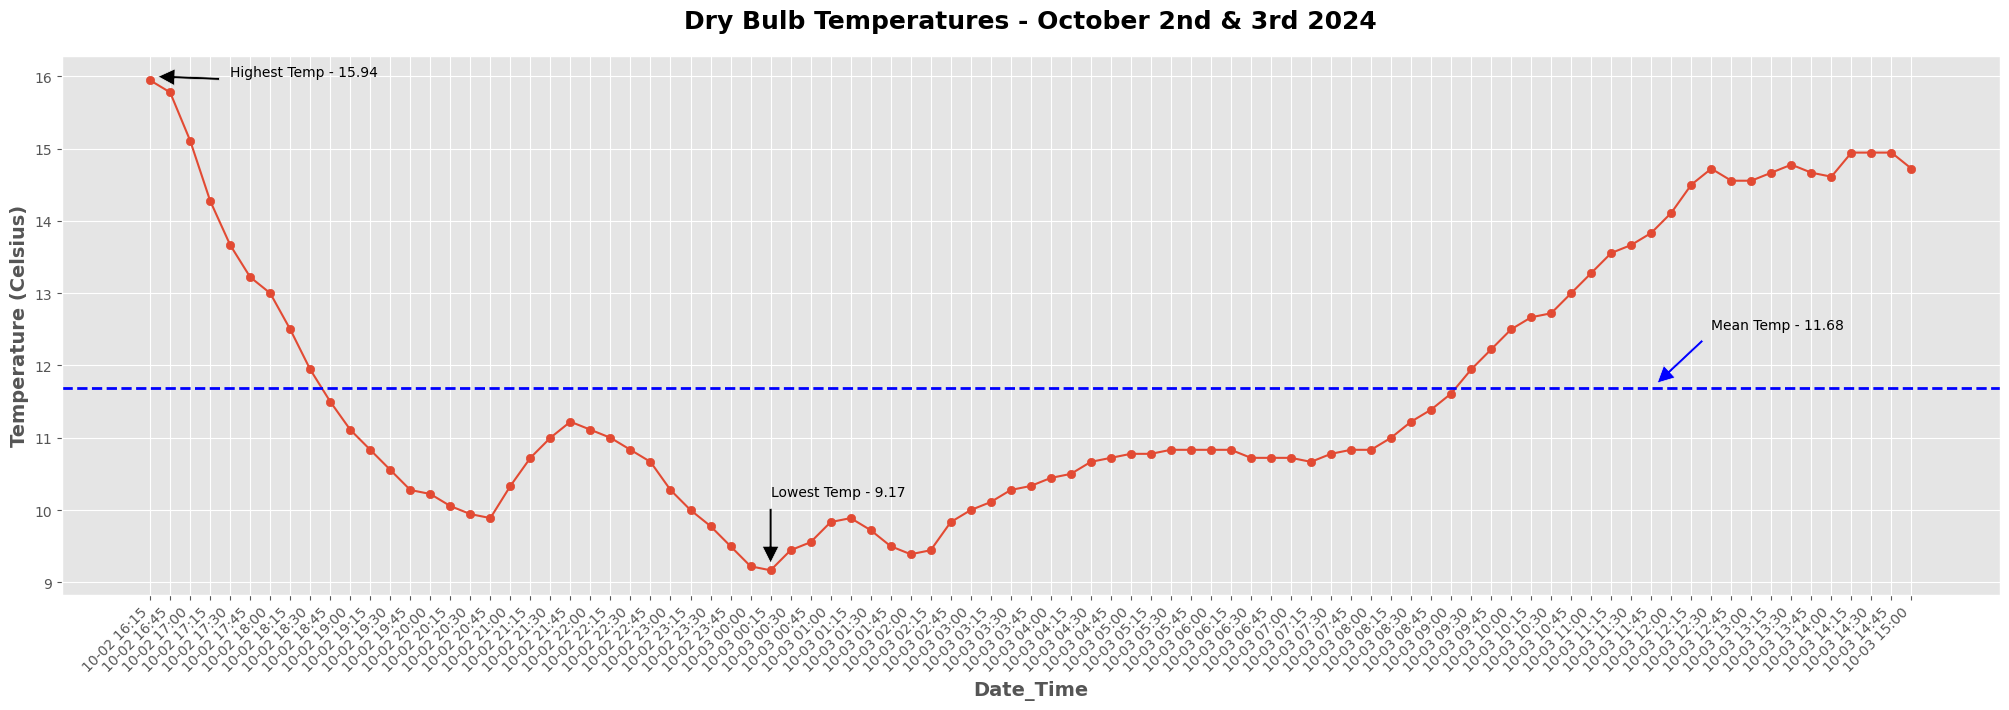

In [87]:

# Apply a graph style, create plot and size plot
plt.style.use('ggplot') # https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
fig, ax = plt.subplots(figsize=(25, 7))

# Create a line and scatter plot in the same graph
ax.plot(x, y,)
ax.scatter(x, y)

# Input title and labels for x and y axes. https://matplotlib.org/stable/users/explain/text/text_intro.html
ax.set_title('Dry Bulb Temperatures - October 2nd & 3rd 2024', pad=20, fontsize=18, fontweight='bold')
ax.set_xlabel('Date_Time', fontsize=14, fontweight='bold')
ax.set_ylabel('Temperature (Celsius)', fontsize=14, fontweight='bold')

# Insert pointers to max, min, and mean values. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html#matplotlib.pyplot.annotate
ax.annotate('Highest Temp - 15.94', (0, 16), xytext=(4, 16), arrowprops=dict(facecolor='black', shrink=0.1, width=2))
ax.annotate('Lowest Temp - 9.17', (31, 9.17), xytext=(31, 10.2), arrowprops=dict(facecolor='black', shrink=0.1, width=2))
ax.annotate('Mean Temp - 11.68', (75, 11.68), xytext=(78, 12.5), arrowprops=dict(facecolor='blue', shrink=0.1, width=2))

# Insert a line for mean value. https://www.statology.org/matplotlib-average-line/
plt.axhline(y=mean_y, color='b', linestyle='--', linewidth=2) 

# Apply x-axis ticks and rotate x-axis dates 45 degrees
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

plt.show

# **End**
____________________________